# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import time

#Metrics 
from nltk.metrics import jaccard_distance as jd
from scipy.stats import pearsonr as pr

# Fetching Data

In [ ]:
#downloading punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Setting the Paths to the files

In [ ]:
# Complete path to the files 
PATH_TEXT_FILE = '/content/drive/MyDrive/Notebooks/IHLT/Labs/test-gold/STS.input.SMTeuroparl.txt'
PATH_GS_FILE = '/content/drive/MyDrive/Notebooks/IHLT/Labs/test-gold/STS.gs.SMTeuroparl.txt'

# Defining Functions



In [ ]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [ ]:
# defining the function for a preprocessing of the data 
def process_data_get_corr(PATH_TEXT_FILE, PATH_GS_FILE):
  '''
  input -> path to the file 1, file 2 

  out   -> pearson correlation coefficient

  '''
  def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union
  df = pd.read_csv(PATH_TEXT_FILE, sep='\t', header=None)
  df.columns = ['Sent_A','Sent_B']
  df_test = df.copy()
  for cols in df_test.columns:
    df_test[cols] = df_test[cols].apply(lambda x: nltk.sent_tokenize(x))
    df_test[cols] = df_test[cols].apply(lambda x: nltk.word_tokenize(x[0]))
    #making a set out of the columns 
    time.sleep(0.1)
    df_test[cols] = df_test[cols].apply(set)
  sent_a = df_test['Sent_A'].values
  sent_b = df_test['Sent_B'].values
  d = []
  for idx, x in enumerate(sent_a):
    jacc = jaccard_similarity(x, sent_b[idx])
    d.append(jacc)
  df_test['gs'] = pd.read_csv(PATH_GS_FILE, sep='\t',header=None)
  df_test['jaccard'] = d
  #corr = pr(df_test['gs'],df_test['jaccard'])[0]

  return df_test

In [ ]:
df_test = process_data_get_corr(PATH_TEXT_FILE, PATH_GS_FILE)
corr = pr(df_test['gs'],df_test['jaccard'])[0]
print(corr)

0.4504977169318684


In [ ]:
PATH = '/content/drive/MyDrive/Notebooks/IHLT/Labs/lab6_data'
df_test['jaccard'].to_csv(f"{PATH}/Jaccard_Session1.csv")

# Exploring the data a bit more

In [ ]:
import seaborn as sns

In [ ]:
#looking at the statistics of the jaccard similarity columns
df_test['jaccard'].describe()

count    459.000000
mean       0.500240
std        0.243399
min        0.052632
25%        0.319091
50%        0.434783
75%        0.600000
max        1.000000
Name: jaccard, dtype: float64

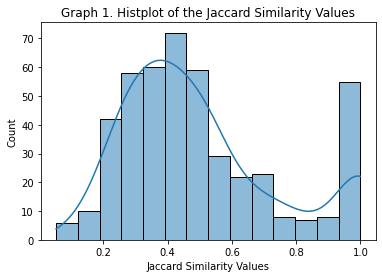

In [ ]:
#lets graph the distribution of the jaccard similarity values 
g = sns.histplot(data=df_test,x='jaccard',kde=True)
g.set_title('Graph 1. Histplot of the Jaccard Similarity Values')
g.set_xlabel('Jaccard Similarity Values');


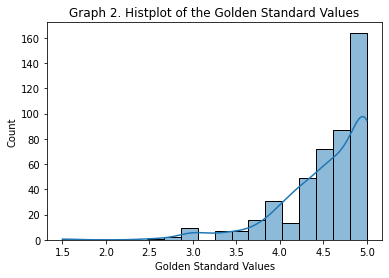

In [ ]:
# the same with the golden standard values 
g = sns.histplot(data=df_test,x='gs',kde=True)
g.set_title('Graph 2. Histplot of the Golden Standard Values')
g.set_xlabel('Golden Standard Values');

Text(0.5, 0, 'Golden Standard')

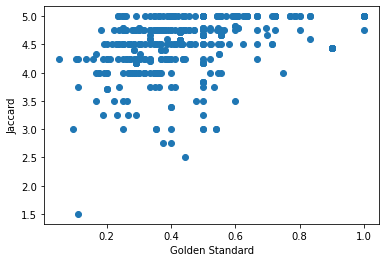

In [ ]:
# let's do a scatter plot to see how they are
plt.scatter(df_test['jaccard'],
         df_test['gs'])
plt.ylabel('Jaccard')
plt.xlabel('Golden Standard')

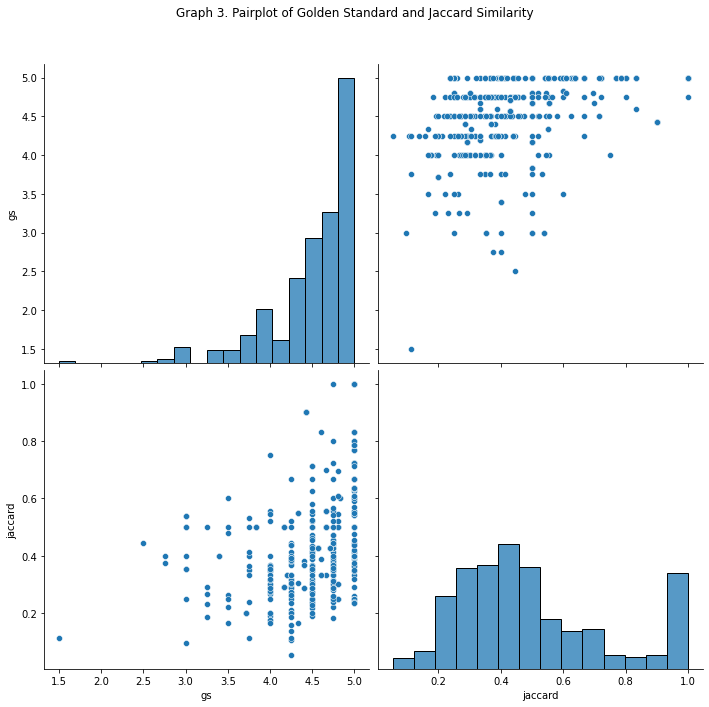

In [ ]:
# Much nicer summarized in a pairplot
g = sns.pairplot(df_test[['gs','jaccard']], height=5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Graph 3. Pairplot of Golden Standard and Jaccard Similarity');

# Unused Code (it is within the function get_process_data() ) 

In [ ]:
# reading the files and merging into one dataframe 
df = pd.read_csv(PATH_TEXT_FILE, sep='\t', header=None)
#df.columns = ['Sent_A', 'Sent_B','gs']
df.columns = ['Sent_A', 'Sent_B']

#setting a copy just in case
df_test = df.copy()

In [ ]:

#First Sentence
df_test['Sent_A'] = df_test['Sent_A'].apply(lambda x: nltk.sent_tokenize(x))
df_test['Sent_A'] = df_test['Sent_A'].apply(lambda x: nltk.word_tokenize(x[0]))


#Second Sentence
df_test['Sent_B'] = df_test['Sent_B'].apply(lambda x: nltk.sent_tokenize(x))
df_test['Sent_B'] = df_test['Sent_B'].apply(lambda x: nltk.word_tokenize(x[0]))

In [ ]:
df_test['Sent_A'] = df_test['Sent_A'].apply(set)
df_test['Sent_B'] = df_test['Sent_B'].apply(set)

In [ ]:
sent_a = df_test['Sent_A'].values
sent_b = df_test['Sent_B'].values

In [ ]:
#generate a list of the jaccard values 
d = []
for idx, x in enumerate(sent_a):
  jacc = jaccard_similarity(x, sent_b[idx])
  d.append(jacc)

In [ ]:
#adding the gs score 
df_test['gs'] = pd.read_csv(PATH_GS_FILE, sep='\t',header=None)
df_test['jaccard'] = d

In [ ]:
corr = pr(df_test['gs'],df_test['jaccard'])[0]

# Report

1. **Design Decisions**



The process followed during the exercise required the use of the following libraries:
- nltk
- pandas
- scipy.stats pearsonr

The tokenization was performed using the punkt tokenizer from the nltk library. Using this allows us to use the word_tokenize as well as the sent_tokenize to be able to split the words, each with different granularity (string --> sentence --> words). 

Once the tokenization is done, we can transform the resulting arrays into sets containing the words. This is done in order to keep one instance of each word per sentence. 

In order to perform the jaccard distance we opted to manually implement a method rather than using the provided formula *1 -  nltk.metrics jaccard_distance(setA, setB)* from  nltk.metrics. The goal is to familiarize with the inner workings of the concept and really get a grasp of how the data inside the sets affects the process. Additionally, it is a simpler solution which we can use to create a collection of functions and processes from this course. 

With the resulting set, we perform Pearson correlation coefficient to check the linear relationship between the gold standard and the resulting jaccard similarity.

2. **Conclusions**

The usage of the Jaccard Similarity, is by definition a measurement of similarity between two sets. Here the sets to be compared are two different sentences ('Sent_A' & 'Sent_B' respectively). Albeit, it is a simple way to compare similarity of a sentence it is not the most powerful. However, it is a good way to understand set operation in NLP. The values of the Jaccard Similarity show that the more similar they are, the lower is the distance between the two sets, given their mathematical relationship: 

Jaccard(Distance) = 1 - Jaccard(similarity) 

We saw that the average Jaccard similarity is ~0.5, this means that they are equally distant from each other, meaning they are 50% similar in 459 of the cases.

Upon further exploration of the data, it would be very nice to cluster the sentences in order to visualize the similarities between them. I would apply a TF-IDF, which we can then vectorize and calculate the cosine similarity. This would be a very nice extension to this, since it can include more visualization than the distribution or pairplot that was included in this notebook. 

